In [96]:
import pandas as pd
import numpy as np

In [97]:
from sklearn.datasets import make_regression

In [98]:
X, y = make_regression(n_samples=10,n_features=3)

In [99]:
X

array([[ 1.4285131 ,  0.75753797, -0.48118947],
       [-1.85643396, -0.59066019, -0.28438817],
       [ 0.2896336 ,  0.8943276 ,  1.18972795],
       [ 1.54203621,  2.14690289, -0.29996536],
       [ 1.22487623, -0.65491159, -0.73447495],
       [ 0.01875412, -0.44179378, -1.14150341],
       [-0.84848983, -0.37297983,  0.92933431],
       [ 0.85596601, -0.34550035,  0.36189039],
       [-0.37209691, -0.2765588 ,  0.63400907],
       [ 0.09729161, -0.35906726, -2.01328971]])

In [100]:
df = pd.DataFrame(X)
df['y_true'] = y
df

,0,1,2,y_true
0,1.428513,0.757538,-0.481189,99.845926
1,-1.856434,-0.590660,-0.284388,-152.180696
2,0.289634,0.894328,1.189728,171.240330
3,1.542036,2.146903,-0.299965,244.048675
4,1.224876,-0.654912,-0.734475,-54.983775
5,0.018754,-0.441794,-1.141503,-113.332016
6,-0.848490,-0.372980,0.929334,-10.773128
7,0.855966,-0.345500,0.361890,28.264926
8,-0.372097,-0.276559,0.634009,-0.516855
9,0.097292,-0.359067,-2.013290,-158.529316


In [101]:
df['y_pred_0'] = df['y_true'].mean() #для начала выбираем начальное случайное значение в нашем случае возьмём сдеднее по y_true

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(df['y_true'], df['y_pred_0'])


104.43324571785622

In [103]:
df['residual_0'] = df['y_true'] - df['y_pred_0'] #остатки/ошибки
df

,0,1,2,y_true,y_pred_0,residual_0
0,1.428513,0.757538,-0.481189,99.845926,5.308407,94.537519
1,-1.856434,-0.590660,-0.284388,-152.180696,5.308407,-157.489103
2,0.289634,0.894328,1.189728,171.240330,5.308407,165.931923
3,1.542036,2.146903,-0.299965,244.048675,5.308407,238.740268
4,1.224876,-0.654912,-0.734475,-54.983775,5.308407,-60.292182
5,0.018754,-0.441794,-1.141503,-113.332016,5.308407,-118.640424
6,-0.848490,-0.372980,0.929334,-10.773128,5.308407,-16.081535
7,0.855966,-0.345500,0.361890,28.264926,5.308407,22.956519
8,-0.372097,-0.276559,0.634009,-0.516855,5.308407,-5.825262
9,0.097292,-0.359067,-2.013290,-158.529316,5.308407,-163.837723


In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
tree_1 = DecisionTreeRegressor(max_depth=1)
tree_1.fit(df[[0,1,2]],df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [105]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [106]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,1.428513,0.757538,-0.481189,99.845926,5.308407,94.537519,166.403237
1,-1.856434,-0.590660,-0.284388,-152.180696,5.308407,-157.489103,-71.315673
2,0.289634,0.894328,1.189728,171.240330,5.308407,165.931923,166.403237
3,1.542036,2.146903,-0.299965,244.048675,5.308407,238.740268,166.403237
4,1.224876,-0.654912,-0.734475,-54.983775,5.308407,-60.292182,-71.315673
5,0.018754,-0.441794,-1.141503,-113.332016,5.308407,-118.640424,-71.315673
6,-0.848490,-0.372980,0.929334,-10.773128,5.308407,-16.081535,-71.315673
7,0.855966,-0.345500,0.361890,28.264926,5.308407,22.956519,-71.315673
8,-0.372097,-0.276559,0.634009,-0.516855,5.308407,-5.825262,-71.315673
9,0.097292,-0.359067,-2.013290,-158.529316,5.308407,-163.837723,-71.315673


[Text(0.5, 0.75, 'x[1] <= 0.24\nsquared_error = 16364.353\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 4939.198\nsamples = 7\nvalue = -71.316'),
 Text(0.75, 0.25, 'squared_error = 3465.85\nsamples = 3\nvalue = 166.403')]

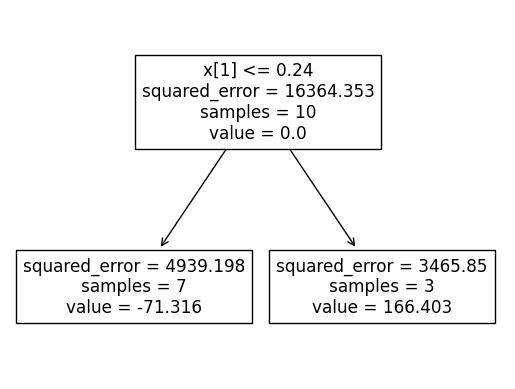

In [107]:
plot_tree(tree_1)

In [108]:
nu = 0.1
df['y_pred_1'] = df['y_pred_0'] + nu*df['tree_pred_1']
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,1.428513,0.757538,-0.481189,99.845926,5.308407,94.537519,166.403237,21.948731
1,-1.856434,-0.590660,-0.284388,-152.180696,5.308407,-157.489103,-71.315673,-1.823160
2,0.289634,0.894328,1.189728,171.240330,5.308407,165.931923,166.403237,21.948731
3,1.542036,2.146903,-0.299965,244.048675,5.308407,238.740268,166.403237,21.948731
4,1.224876,-0.654912,-0.734475,-54.983775,5.308407,-60.292182,-71.315673,-1.823160
5,0.018754,-0.441794,-1.141503,-113.332016,5.308407,-118.640424,-71.315673,-1.823160
6,-0.848490,-0.372980,0.929334,-10.773128,5.308407,-16.081535,-71.315673,-1.823160
7,0.855966,-0.345500,0.361890,28.264926,5.308407,22.956519,-71.315673,-1.823160
8,-0.372097,-0.276559,0.634009,-0.516855,5.308407,-5.825262,-71.315673,-1.823160
9,0.097292,-0.359067,-2.013290,-158.529316,5.308407,-163.837723,-71.315673,-1.823160


In [109]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

96.13662606663463